# Problemas de prueba de hipótesis

## Ejercicio 1

Usted es un nutricionista que investiga dos tipos diferentes de dietas para ver si existe una diferencia significativa en la pérdida de peso después de un mes. Eliges dos grupos aleatorios de personas; un grupo sigue la primera dieta y el otro sigue la segunda. Al final del mes, se registra la pérdida de peso (en kg) de cada persona:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

Con estos datos se busca responder a la siguiente pregunta: ¿Existe una diferencia significativa en la pérdida de peso promedio entre las personas que siguieron la primera dieta y las que siguieron la segunda dieta?

Para sacar conclusiones, siga los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba para comprobar la hipótesis. Puede utilizar la prueba t de Student.
-Analizar las conclusiones.

### Hipótesis

- **Hipótesis nula (H₀):** No hay diferencia significativa entre las medias → 
> \( \mu_1 = \mu_2 \)
- **Hipótesis alternativa (H₁):** Sí hay diferencia significativa entre las medias → 
> \( \mu_1 \ne \mu_2 \)


In [8]:
import numpy as np
from scipy.stats import ttest_ind # ttest_ind es una función de scipy.stats que realiza la prueba t de Student para muestras independientes.


Cada número representa cuántos kilos perdió una persona en ese grupo:

✅ **¿Qué mide la prueba t de Student para muestras independientes?**

La **prueba t de Student** compara si las medias de dos grupos son **estadísticamente diferentes**.

Lo que compara **NO es simplemente** `dieta1.mean() - dieta2.mean()`  
(eso sería solo la diferencia observada), sino una **razón entre señal y ruido**:

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{\text{error estándar combinado}}
$$

💡 El **numerador** es la **diferencia de medias**  
💡 El **denominador** es el “**ruido**” o **variabilidad total** de ambas muestras


In [9]:
import numpy as np
from scipy.stats import ttest_ind


# Estas son las muestras de pérdida de peso, una para cada dieta.  

dieta1 = np.array([2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5])
dieta2 = np.array([3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2])

# vamos a ver las varianzas para el parámetro de equal_var de la prueba t

print("Varianza Dieta 1:", np.var(dieta1, ddof=1)) 
print("Varianza Dieta 2:", np.var(dieta2, ddof=1))
print("La dispersión (variabilidad de los datos) es casi 5 veces más grande, haremos el test de Welch en lugar del t student")



Varianza Dieta 1: 0.10952380952380954
Varianza Dieta 2: 0.02238095238095242
La dispersión (variabilidad de los datos) es casi 5 veces más grande, haremos el test de Welch en lugar del t student


| Característica                 | t de Student (clásica)      | t de Welch (modificada)            |
| ------------------------------ | --------------------------- | ---------------------------------- |
| **Asume varianzas iguales**    | ✅ Sí                        | ❌ No                               |
| **Fórmula del error estándar** | Usa varianza combinada      | Usa varianzas individuales         |
| **Grados de libertad**         | Simples                     | Ajustados con fórmula más compleja |
| **Uso preferido cuando...**    | Las varianzas son similares | Las varianzas son diferentes       |


In [10]:
# Hipótesis:
# H₀: μ₁ = μ₂ (no hay diferencia)
# H₁: μ₁ ≠ μ₂ (sí hay diferencia)

# # Prueba t (usando Welch porque las varianzas no son iguales como ya hemos visto)
t_stat, p_value = ttest_ind(dieta1, dieta2, equal_var=False) 

print(f"Valor t: {t_stat}")
print(f"P-valor: {p_value}")


Valor t: -3.5383407969933938
P-valor: 0.007125697852423989


✏️ Explicación del código:  

- *ttest_ind(...)* compara las dos muestras.

- *equal_var=True* asume que las dos poblaciones tienen varianzas iguales. Sería T studient pero  
en este caso usamos False para T Welch.
  
Devuelve:

- *Valor t*: -3.538    
→ Esto indica que la media de la Dieta 1 es menor que la de Dieta 2 (por eso el valor t es negativo).

- *p_value*:  0.0071  
→ Este número nos dice como de probable sería observar una diferencia como la encontrada, si la hipótesis nula fuera cierta. Normalmente usamos α=0.05 por lo que:  
> p-value 0.0071 < 0.05 α

Como el p-valor es menor que 0.05, la probabilidad de que esta diferencia azar es muy baja.  
Por tanto:  

- Rechazamos la hipótesis nula (H₀)
- Aceptamos la hipótesis alternativa (H₁). **Hay una diferencia significativa entre ambas dietas.**

## ANOVA

**ANOVA** (*Analysis of Variance - Análisis de variación*) Es una técnica estadística utilizada para comparar las medidas de dos o más grupos. La idea detrás de ANOVA es descomponer la variabilidad total de los datos en dos componentes: variabilidad entre grupos y variabilidad dentro de los grupos:

- **Variabilidad entre grupos**: Esta variabilidad se refiere a las diferencias entre las medias del grupo. Si esta variabilidad es considerablemente mayor que la variabilidad dentro del grupo, podría ser una indicación de que al menos una de las medias del grupo es diferente.
- **Variabilidad dentro del grupo**: Esta variabilidad se refiere a la dispersión de los datos dentro de cada grupo. Si todos los grupos tienen una variabilidad similar, entonces cualquier diferencia notable en las medias de los grupos podría considerarse significativa.

Las hipótesis en ANOVA suelen incluir:

- **Hipótesis nula** ($H₀$): Las medias de todos los grupos son iguales.
- **Hipótesis alternativa** ($H₁$): Al menos una de las medias del grupo es diferente.

Si el resultado de la prueba ANOVA es significativo (por ejemplo, un valor p inferior a un umbral como 0,05), esto sugiere que al menos la media de un grupo es diferente.

## Ejercicio 2

Un agricultor decide probar tres tipos diferentes de fertilizantes para determinar si alguno es superior en términos de producción de maíz. El agricultor planta maíz en 15 parcelas idénticas y utiliza los tres fertilizantes (5 parcelas para cada tipo). Al final de la temporada mide el rendimiento de maíz (en kg) de cada parcela, con el siguiente resultado:

| Fertilizante 1 | Fertilizante 2 | Fertilizante 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

Con estos datos busca responder la siguiente pregunta: ¿Existe una diferencia significativa en el rendimiento promedio del maíz entre los tres tipos de fertilizantes?

Para ayudarte, sigue los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba ANOVA.
-Analizar las conclusiones.
-Si un fertilizante es mejor que otro, ¿cómo podemos saberlo?

In [16]:
import numpy as np
from scipy.stats import f_oneway # para hacer ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd # para hacer Tukey
import matplotlib.pyplot as plt # graficar es entender


In [12]:
fert1 = np.array([20, 21, 20, 19, 20])
fert2 = np.array([22, 21, 23, 22, 21])
fert3 = np.array([24, 23, 22, 23, 24])

# prueba ANOVA
f_stat, p_value = f_oneway(fert1, fert2, fert3)

print(f"Estadístico F: {f_stat}")
print(f"P-valor: {p_value}")

Estadístico F: 20.315789473684188
P-valor: 0.00014047824793190475


- P-value < 0.05, volvemos a rechazar la hipótesis nula y aceptamos que al menos uno de los 3 fertilizantes tiene un redimiento promedio distinto. 
- El estadístico F es altísimo, lo que significa que al menos uno de los grupos tiene una media muy distinta al resto.

-  **¿Qué es el test Tukey HSD?**
El test de Tukey HSD (Honest Significant Difference) es una prueba post hoc que se realiza después de un ANOVA significativo.  
Sirve para comparar todas las medias de los grupos por pares y decirnos exactamente cuáles difieren significativamente entre sí, manteniendo el control del error tipo I global (FWER).

In [14]:
# Creamos lista con todos los valores de los fertilizantes
fertilizantes = np.concatenate([fert1, fert2, fert3]) # concatenamos en vez de sumer fert1 + fert2 + ... para mantener los arrays

# Creamos etiquetas indicando a qué grupo pertenece cada dato
grupos = ['Fert1']*5 + ['Fert2']*5 + ['Fert3']*5

# Aplicamos Tukey HSD
tukey_resultado = pairwise_tukeyhsd(endog=fertilizantes, groups=grupos, alpha=0.05)
print(tukey_resultado)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
 Fert1  Fert2      1.8 0.0099 0.4572 3.1428   True
 Fert1  Fert3      3.2 0.0001 1.8572 4.5428   True
 Fert2  Fert3      1.4 0.0409 0.0572 2.7428   True
--------------------------------------------------


| Columna            | Significado                                              |
| ------------------ | -------------------------------------------------------- |
| `group1`, `group2` | Los grupos que se están comparando                       |
| `meandiff`         | Diferencia de medias entre los grupos                    |
| `p-adj`            | P-valor ajustado (para múltiples comparaciones)          |
| `lower`, `upper`   | Intervalo de confianza al 95% de la diferencia de medias |
| `reject`           | Si es `True`, la diferencia es significativa (p < 0.05)  |


✅ Todos los fertilizantes difieren significativamente entre sí en cuanto al rendimiento.
  
✅ El fertilizante 3 es el más efectivo (tiene la media más alta).

✅ Le sigue el fertilizante 2.

✅ El fertilizante 1 es el que produce menos maíz.

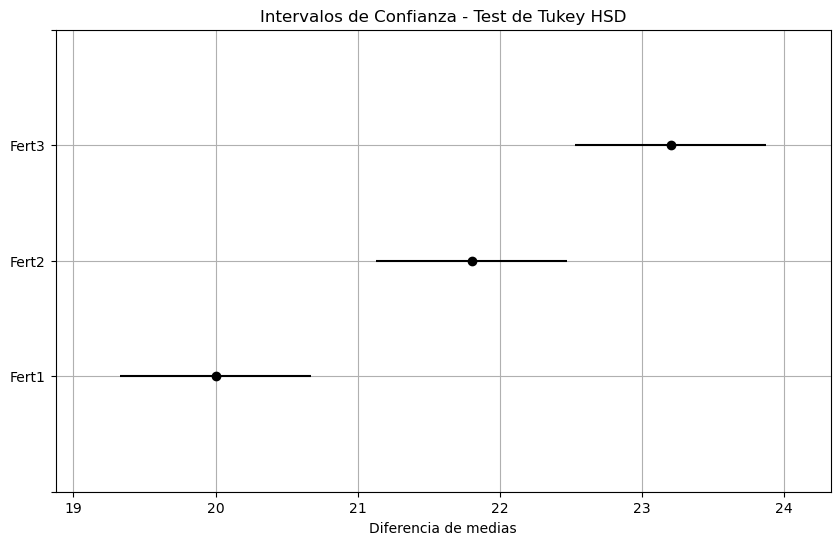

In [17]:
tukey_resultado.plot_simultaneous()
plt.title("Intervalos de Confianza - Test de Tukey HSD")
plt.xlabel("Diferencia de medias")
plt.grid(True)
plt.show()